In [1]:
# Import relevant items
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

In [2]:
# Let's first load the data and take a look at what we have.
df = pd.read_csv('Housing.xls')

In [3]:
print(df.head())
print(df.columns)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'baseme

In [4]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

In [6]:
# # #drop unneeded features
# df = df.drop(['wd','station'], axis=1)

# # df.columns

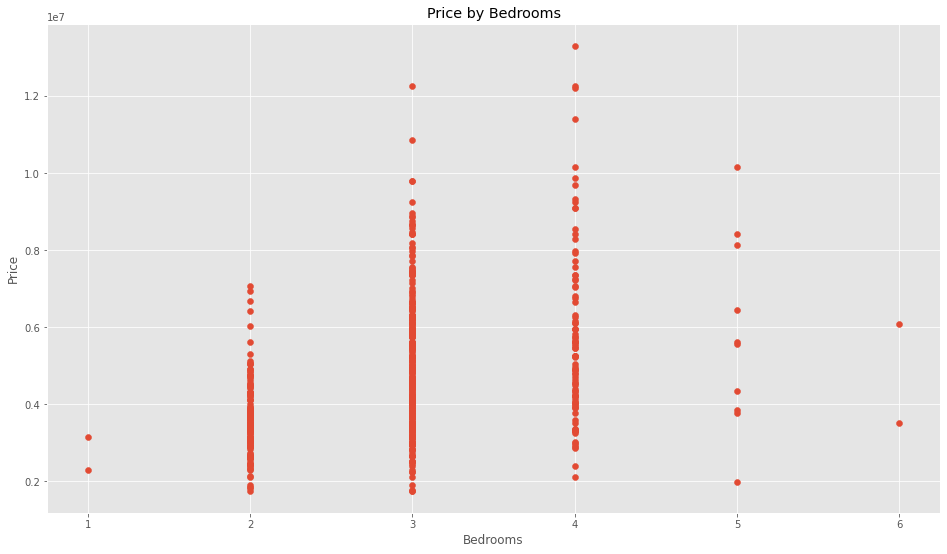

In [7]:
x = df['bedrooms']
y = df['price']
plt.scatter(x,y)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price by Bedrooms')
plt.show()

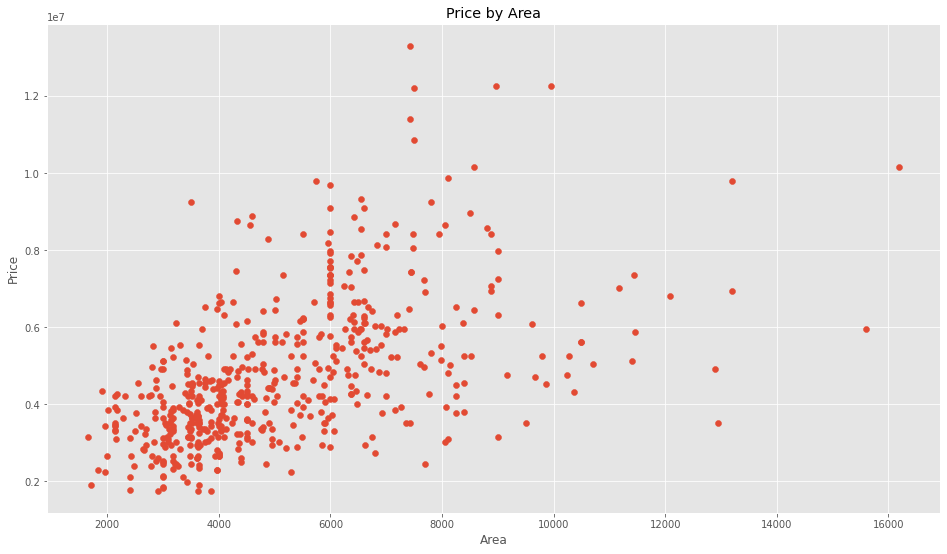

In [8]:
x = df['area']
y = df['price']
plt.scatter(x,y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price by Area')
plt.show()

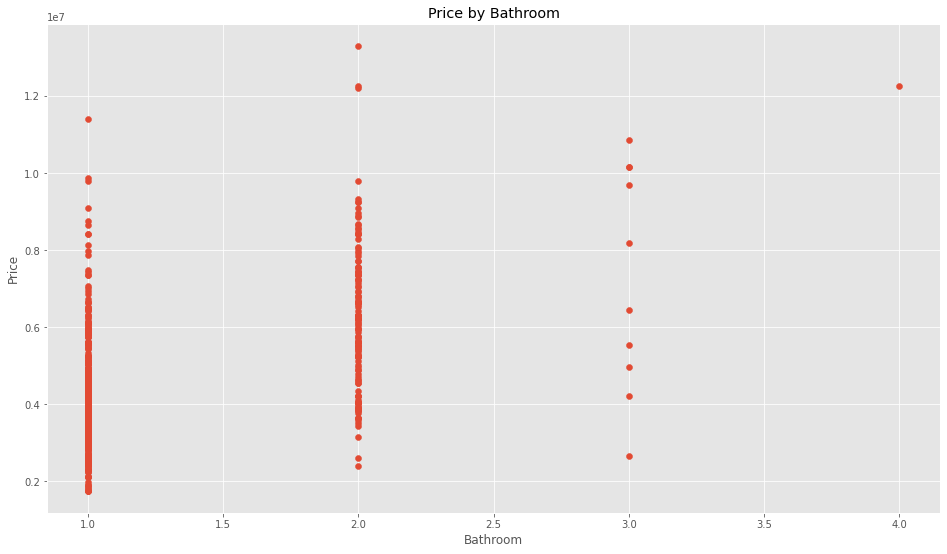

In [9]:
x = df['bathrooms']
y = df['price']
plt.scatter(x,y)
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.title('Price by Bathroom')
plt.show()

In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


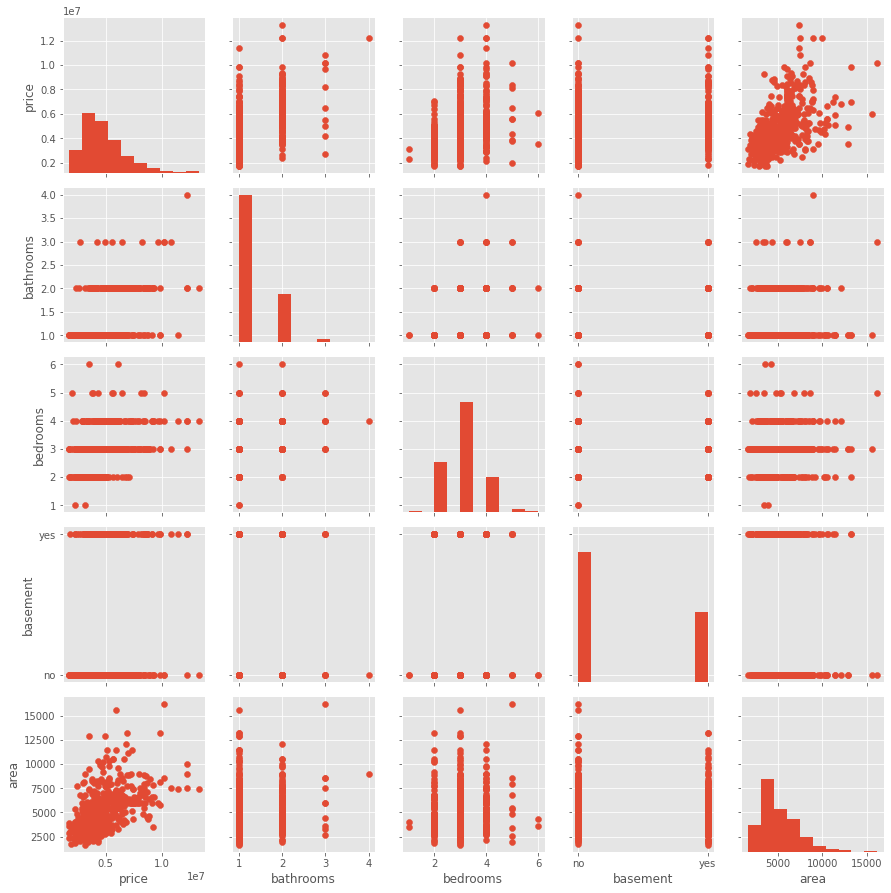

In [11]:

import seaborn as sns
g = sns.PairGrid(df, vars=["price", "bathrooms", "bedrooms", "basement", "area"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

<AxesSubplot:>

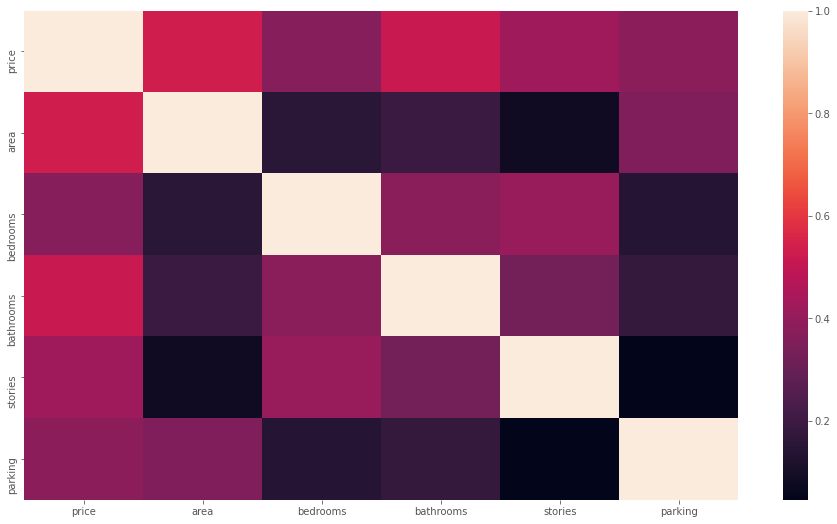

In [12]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [13]:
df.dropna(inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [14]:
df = df.replace(['yes','no','furnished','semi-furnished','unfurnished'],[1,0,1,.5,0])

## Split into Training and Test Data

In [15]:
y = df['price']

In [16]:
X = df.drop(['price'], axis=1)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [18]:
X_train.shape, y_train.shape

((381, 12), (381,))

In [19]:
X_test.shape, y_test.shape

((164, 12), (164,))

In [20]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

# Linear Regression


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [22]:
# Train the model using the training sets
regr.fit(X_train, y_train)


LinearRegression()

In [23]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

In [24]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.6417292962543848

In [25]:
from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

Coefficients: 
 [2.46698761e+02 1.19909409e+05 8.62717519e+05 5.13832646e+05
 3.90403415e+05 3.78069011e+05 4.28319342e+05 7.87667190e+05
 8.87800538e+05 2.80923478e+05 6.33367296e+05 5.04726685e+05]
Root mean squared error: 1115652.44
Mean absolute error: 788777.46
R-squared: 0.64


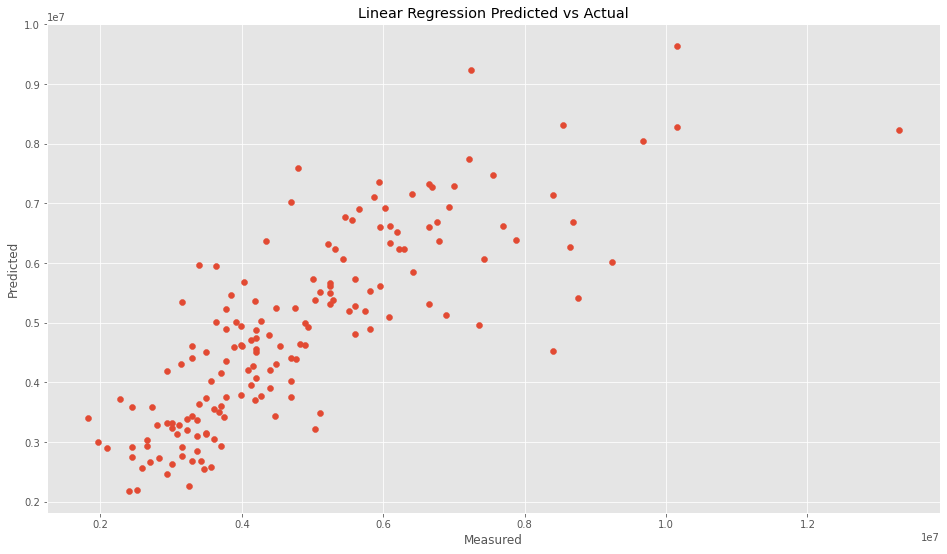

In [26]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

# Neural Network Regression


In [27]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [28]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

c:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [29]:


# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score



-6.450231965182402

In [30]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [31]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 5087543.90
Mean absolute error: 4739364.95
R-squared: -6.45


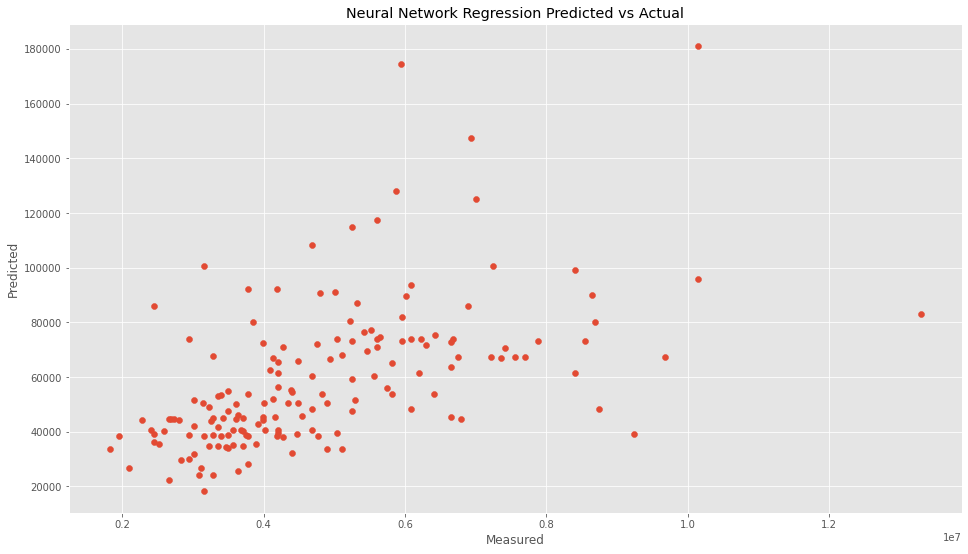

In [32]:
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()